In [19]:
import pandas as pd

df = pd.read_csv('Weather/weather_train.csv')

In [20]:
print("num istanze: ", len(df))
print("ci sono missing values: ", df.isnull().values.any())
print("è bilanciato? ", df['weather_main'].value_counts())
df

num istanze:  158131
ci sono missing values:  False
è bilanciato?  clear     77750
clouds    64130
rain      16251
Name: weather_main, dtype: int64


,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2016-05-26 09:00:00+02:00,Bilbao,288.420,285.150,290.930,1012,93,0,0,0.0,0.0,0.0,75,803,clouds,broken clouds,04d
1,2016-07-16 10:00:00+02:00,Madrid,299.037,299.037,299.037,961,44,2,83,0.0,0.0,0.0,0,800,clear,sky is clear,01d
2,2018-06-03 05:00:00+02:00,Madrid,285.150,285.150,285.150,1017,100,0,0,0.0,0.0,0.0,56,803,clouds,broken clouds,04n
3,2018-10-19 10:00:00+02:00,Valencia,289.150,289.150,289.150,1011,100,4,320,0.9,0.0,0.0,75,521,rain,shower rain,09d
4,2017-11-25 07:00:00+01:00,Seville,279.940,279.150,281.150,1019,81,0,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158126,2016-08-01 10:00:00+02:00,Madrid,297.760,293.710,305.050,1021,56,2,30,0.0,0.0,0.0,0,800,clear,sky is clear,01d
158127,2017-10-12 00:00:00+02:00,Barcelona,292.830,291.150,294.150,1024,88,0,280,0.0,0.0,0.0,0,800,clear,sky is clear,01n
158128,2015-11-09 16:00:00+01:00,Bilbao,292.810,292.810,292.810,1031,62,1,25,0.0,0.0,0.0,0,800,clear,sky is clear,01
158129,2016-02-25 05:00:00+01:00,Valencia,285.220,285.220,285.220,1012,60,4,265,0.0,0.0,0.0,0,800,clear,sky is clear,01


In [21]:
print(len(df.loc[df['pressure']==0, 'pressure']), len(df.loc[df['humidity']==0, 'humidity']))
df=df.drop(df.loc[df['pressure']==0].index)
df=df.drop(df.loc[df['humidity']==0].index)
print(len(df.loc[df['pressure']==0, 'pressure']), len(df.loc[df['humidity']==0, 'humidity']))

2 59


0 0


(array([1.7000e+01, 5.3000e+01, 1.6100e+02, 3.7100e+02, 8.0800e+02,
        1.4690e+03, 2.9820e+03, 5.2360e+03, 8.1620e+03, 7.0220e+03,
        1.2461e+04, 1.3496e+04, 1.3852e+04, 1.3333e+04, 1.2596e+04,
        1.1570e+04, 1.0947e+04, 1.0525e+04, 8.4880e+03, 4.9110e+03,
        5.7610e+03, 4.7160e+03, 3.3720e+03, 2.4460e+03, 1.6480e+03,
        8.9000e+02, 4.5500e+02, 2.2000e+02, 9.0000e+01, 1.2000e+01]),
 array([264.132 , 266.0326, 267.9332, 269.8338, 271.7344, 273.635 ,
        275.5356, 277.4362, 279.3368, 281.2374, 283.138 , 285.0386,
        286.9392, 288.8398, 290.7404, 292.641 , 294.5416, 296.4422,
        298.3428, 300.2434, 302.144 , 304.0446, 305.9452, 307.8458,
        309.7464, 311.647 , 313.5476, 315.4482, 317.3488, 319.2494,
        321.15  ]),
 <BarContainer object of 30 artists>)

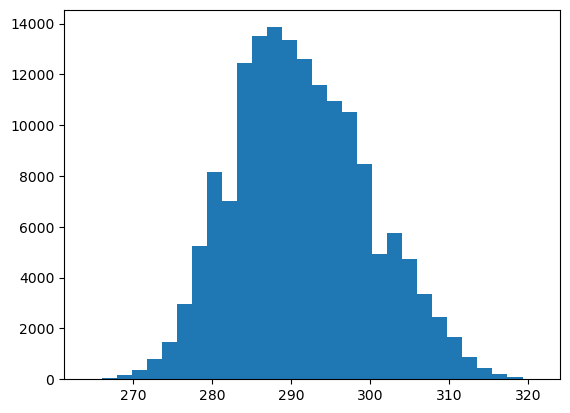

In [22]:
import matplotlib.pyplot as plt
df
plt.hist(df['temp_max'], bins=30)

In [23]:
novanta_cinque = df['temp_max'].quantile(0.95)
last_five = df[df['temp_max']>novanta_cinque]
last_five.groupby('city_name').size()
#(df[df['temp_max']>df['temp_max'].quantile(0.95)]).groupby('city_name').size()


city_name
 Barcelona     539
Bilbao         346
Madrid        1804
Seville       4557
Valencia       531
dtype: int64

La temperatura non è prossima alla temperatura di congelamento quando nevica.


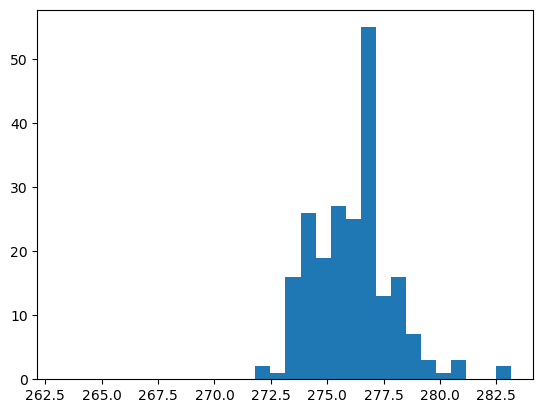

In [24]:
snow=df[df['snow_3h']>0]
#histogram centered on 273.15
plt.hist(df.loc[df['snow_3h']>0, 'temp'], bins=30, range=(273.15-10, 273.15+10))
# Filtra il dataset per selezionare solo le righe in cui la colonna 'snow_3h' ha un valore maggiore di zero
snow_df = df[df['snow_3h'] > 0]

# Calcola la temperatura media e la deviazione standard della temperatura nelle righe selezionate
temp_mean = snow_df['temp'].mean()
temp_std = snow_df['temp'].std()

# Confronta la temperatura media con la temperatura di congelamento
freezing_temp = 273.15
if temp_mean < freezing_temp + temp_std and temp_mean > freezing_temp - temp_std:
    print("La temperatura è prossima alla temperatura dicongelamento quando nevica.")
else:
    print("La temperatura non è prossima alla temperatura di congelamento quando nevica.")

In [25]:
# df.loc[(snow) & (df['temp'] <= 273.15)]

In [26]:
snow['escursion'] = snow['temp_max']-snow['temp_min']
last_five['escursion'] = last_five['temp_max']-last_five['temp_min']
snow[snow['escursion']==0]

C:\Users\dany0\AppData\Local\Temp\ipykernel_4792\1171082712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snow['escursion'] = snow['temp_max']-snow['temp_min']
C:\Users\dany0\AppData\Local\Temp\ipykernel_4792\1171082712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_five['escursion'] = last_five['temp_max']-last_five['temp_min']


,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,escursion
2600,2015-03-23 11:00:00+01:00,Bilbao,276.356000,276.356000,276.356000,1012,98,0,147,0.9,0.0,2.746,92,501,rain,moderate rain,10,0.0
2926,2015-01-20 04:00:00+01:00,Bilbao,275.203000,275.203000,275.203000,1012,97,1,198,0.3,0.0,0.200,88,500,rain,light rain,10,0.0
6250,2015-02-04 20:00:00+01:00,Bilbao,274.826656,274.826656,274.826656,1014,90,3,13,0.3,0.0,20.900,89,500,rain,light rain,10,0.0
10148,2015-02-08 16:00:00+01:00,Bilbao,277.219500,277.219500,277.219500,1031,82,2,21,0.3,0.0,0.200,78,500,rain,light rain,10,0.0
11016,2015-02-01 09:00:00+01:00,Bilbao,276.367344,276.367344,276.367344,1010,92,4,314,0.9,0.0,0.550,92,501,rain,moderate rain,10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152628,2015-02-03 10:00:00+01:00,Bilbao,276.557500,276.557500,276.557500,1004,94,1,281,0.9,0.0,1.100,84,501,rain,moderate rain,10,0.0
153808,2015-02-02 03:00:00+01:00,Bilbao,276.382656,276.382656,276.382656,1012,96,1,250,0.3,0.0,0.050,84,500,rain,light rain,10,0.0
154633,2015-02-04 06:00:00+01:00,Bilbao,273.317000,273.317000,273.317000,1006,97,1,119,0.3,0.0,3.900,88,500,rain,light rain,10,0.0
157078,2015-01-22 10:00:00+01:00,Bilbao,277.648000,277.648000,277.648000,1013,96,2,343,3.0,0.0,2.700,92,502,rain,heavy intensity rain,10,0.0


In [27]:
# Confronta le due medie calcolate per verificare se c'è una differenza significativa
if snow['escursion'].mean() > last_five['escursion'].mean():
    print("L'escursione termica media è maggiore nei giorni in cui nevica.")
else:
    print("L'escursione termica media è maggiore nei giorni caldi.")

L'escursione termica media è maggiore nei giorni caldi.


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

data_text = df.drop(['weather_main', 'weather_description', 'city_name', 'weather_icon', 'weather_id', 'dt_iso', 'clouds_all'], axis=1)
data_label = df['weather_main']
le = LabelEncoder()
le.fit(df["weather_main"])

# trasformare le etichette in valori numerici interi
df["weather_main"] = le.transform(df["weather_main"])
data_label = df['weather_main']
#splitto il dataset in train e test e normalizzo con preprocessing.Normalizer()
X_train, X_test, y_train, y_test = train_test_split(data_text, data_label, test_size=0.2, random_state=0)
normalizer = preprocessing.Normalizer()
normalizer.fit(X_train)
X_train = normalizer.transform(X_train)
X_test = normalizer.transform(X_test)

#creo il modello
decision_tree = DecisionTreeClassifier(random_state=0)
#faccio il fit
decision_tree.fit(X_train, y_train)
#faccio la predizione
y_train_pred = decision_tree.predict(X_train)
y_pred_tree = decision_tree.predict(X_test)


#confronto con logistic regression
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(max_iter=10000, solver='saga')
logistic_regression.fit(X_train, y_train)
y_train_pred_los = logistic_regression.predict(X_train)
y_pred_los = logistic_regression.predict(X_test)




Accuracy of the model on the train set: (Tree) 0.9963940026570507
Accuracy of the model on the test set: (Tree) 0.6890934396153603
Accuracy of the model on the train set: (Logistic) 0.5421174163345354
Accuracy of the model on the test set: (Logistic) 0.5446321250079079


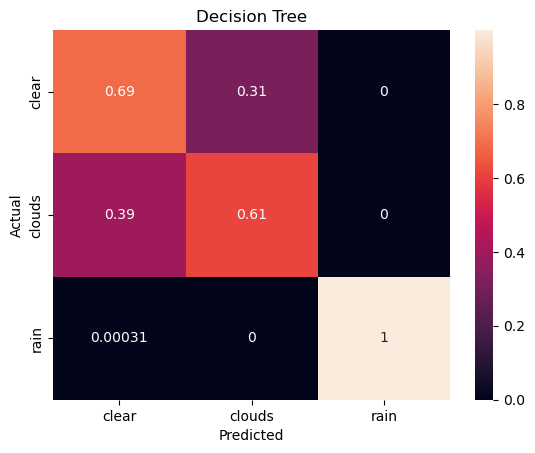

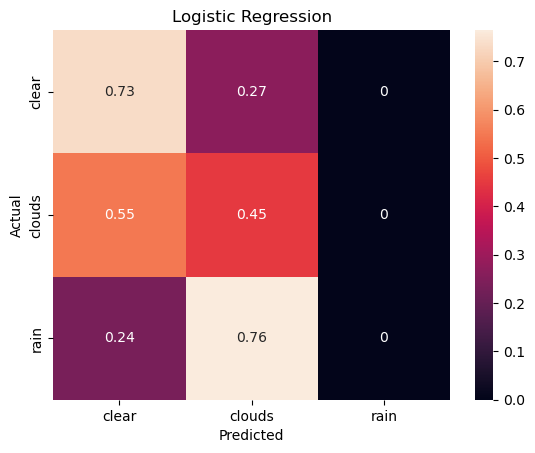

In [29]:
#Calculate the normalized confusion matrix of logistic and decision tree models and compare them
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#calcolo l'accuratezza train decision tree
print("Accuracy of the model on the train set: (Tree)", accuracy_score(y_train, y_train_pred))
#calcolo l'accuratezza test decision tree
print("Accuracy of the model on the test set: (Tree)", accuracy_score(y_test, y_pred_tree))
#calcolo l'accuratezza train logistic regression
print("Accuracy of the model on the train set: (Logistic)", accuracy_score(y_train, y_train_pred_los))
#calcolo l'accuratezza test logistic regression
print("Accuracy of the model on the test set: (Logistic)", accuracy_score(y_test, y_pred_los))
normalized_cm_tree = confusion_matrix(y_test, y_pred_tree, normalize='true')
normalized_cm_los = confusion_matrix(y_test, y_pred_los, normalize='true')
sns.heatmap(normalized_cm_tree, annot=True, yticklabels=le.classes_, xticklabels=le.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Decision Tree')
plt.show()
sns.heatmap(normalized_cm_los, annot=True, yticklabels=le.classes_, xticklabels=le.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Logistic Regression')
plt.show()


In [30]:
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, random_state=0, shuffle=True)

#decision tree
results = cross_val_score(decision_tree, data_text, data_label, cv=kfold)
print("Accuracy: %.2f%%" % (results.mean()*100.0))
# logistic regression
# results = cross_val_score(logistic_regression, data_text, data_label, cv=kfold)
# print("Accuracy: %.2f%%" % (results.mean()*100.0))


Accuracy: 71.18%


In [36]:
#pipeline with normalizer and pca
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

df = pd.read_csv('weather/weather_train.csv')
le.fit(df["weather_main"])
df["weather_main"] = le.transform(df["weather_main"])
data_label = df['weather_main']
data_text = df.drop(['weather_main', 'weather_description', 'city_name', 'weather_icon', 'weather_id', 'dt_iso', 'clouds_all'], axis=1)

print(data_text.head())
#scelgo le features da trasformare
#creo il pipeline
preprocess = Pipeline([('normalizer', preprocessing.Normalizer()), ('pca', PCA(n_components=5))])
#trasformo le features

pipe = Pipeline(steps=[('preprocess', preprocess), ('decision_tree', decision_tree)])

results = cross_val_score(pipe, data_text, data_label, cv=kfold)
print("Accuracy: %.2f%%" % (results.mean()*100.0))






      temp  temp_min  temp_max  pressure  humidity  wind_speed  wind_deg  \
0  288.420   285.150   290.930      1012        93           0         0   
1  299.037   299.037   299.037       961        44           2        83   
2  285.150   285.150   285.150      1017       100           0         0   
3  289.150   289.150   289.150      1011       100           4       320   
4  279.940   279.150   281.150      1019        81           0        50   

   rain_1h  rain_3h  snow_3h  
0      0.0      0.0      0.0  
1      0.0      0.0      0.0  
2      0.0      0.0      0.0  
3      0.9      0.0      0.0  
4      0.0      0.0      0.0  
Accuracy: 57.61%


In [41]:
#concateno le features trasformate con le altre features
data_text = df.drop(['weather_main', 'weather_description', 'city_name', 'weather_icon', 'weather_id', 'dt_iso', 'clouds_all'], axis=1)
X_pca = preprocess.named_steps['pca'].fit_transform(data_text)
df_pca = pd.concat([data_text, pd.DataFrame(X_pca)], axis=1)

df_pca.columns = data_text.columns.tolist() + ['pca'+str(i) for i in range(5)]  # rename columns for the warning
print(df_pca.head())
results = cross_val_score(decision_tree, df_pca, data_label, cv=kfold)
print("Accuracy: %.2f%%" % (results.mean()*100.0))


      temp  temp_min  temp_max  pressure  humidity  wind_speed  wind_deg  \
0  288.420   285.150   290.930      1012        93           0         0   
1  299.037   299.037   299.037       961        44           2        83   
2  285.150   285.150   285.150      1017       100           0         0   
3  289.150   289.150   289.150      1011       100           4       320   
4  279.940   279.150   281.150      1019        81           0        50   

   rain_1h  rain_3h  snow_3h        pca0        pca1       pca2       pca3  \
0      0.0      0.0      0.0  -62.636560  168.010684 -24.759256  -6.774890   
1      0.0      0.0      0.0 -113.628473   84.991604  27.624688  -3.444037   
2      0.0      0.0      0.0  -57.637120  167.985276 -33.353453  -4.848610   
3      0.9      0.0      0.0  -63.622981 -151.957535 -30.169286 -14.016543   
4      0.0      0.0      0.0  -55.632861  117.850349 -19.884417  10.650348   

       pca4  
0  1.847881  
1 -2.400903  
2 -2.049594  
3 -2.057460  
4  0

In [49]:
#grid search su pipeline
from sklearn.model_selection import GridSearchCV
data_text = df.drop(['weather_main', 'weather_description', 'city_name', 'weather_icon', 'weather_id', 'dt_iso', 'clouds_all'], axis=1)
#creo il grid search
grid = GridSearchCV(param_grid={'preprocess__pca__n_components': [5, 6, 7, 8, 9, 10]}, estimator=pipe, cv=kfold)

grid.fit(data_text, data_label)
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)


Accuracy: 57.61%
{'preprocess__pca__n_components': 10}
0.6953032846241849
Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('normalizer', Normalizer()),
                                 ('pca', PCA(n_components=10))])),
                ('decision_tree', DecisionTreeClassifier(random_state=0))])


In [55]:
data_text = pd.read_csv('Weather/weather_test.csv')
data_text = data_text.drop(['weather_description', 'city_name', 'weather_icon', 'weather_id', 'dt_iso', 'clouds_all'], axis=1)
data_label_test = pd.read_csv('Weather/class.csv')
data_label_test = data_label_test['weather_main'] # get the labels
# trasformare le etichette in valori numerici interi
le.fit(data_label_test)
data_label_test = le.transform(data_label_test)
score = cross_val_score(pipe, data_text, data_label_test, cv=kfold)
print("Accuracy: %.2f%%" % (score.mean()*100.0))

Accuracy: 46.19%


In [59]:
#linear regression
from sklearn.linear_model import LinearRegression
data_text = df.drop(['weather_main', 'weather_description', 'city_name', 'weather_icon', 'weather_id', 'dt_iso', 'clouds_all'], axis=1)
linear_regression = LinearRegression()

pipe = Pipeline(steps=[('preprocess', preprocess), ('linear_regression', linear_regression)])
X_train, X_test, y_train, y_test = train_test_split(data_text, data_label, test_size=0.2, random_state=0)

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_pred = pipe.predict(X_test)
print("Accuracy of the model on the train set: ", accuracy_score(y_train, y_train_pred.round()))
print("Accuracy of the model on the test set: ", accuracy_score(y_test, y_pred.round()))



Accuracy of the model on the train set:  0.520766141782078
Accuracy of the model on the test set:  0.5164258386821386
